In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Ross_Extent = pd.read_excel(filepath, sheet_name='Ross-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Ross_Extent)
fp.date_time(Ross_Extent)

,Extent,Date
0,1040455.516,1979-01-01
1,239334.118,1979-02-01
2,557365.154,1979-03-01
3,2054855.924,1979-04-01
4,2973925.625,1979-05-01
...,...,...
533,3137598.938,2023-06-01
534,3201783.453,2023-07-01
535,2973294.266,2023-08-01
536,3354839.711,2023-09-01


In [5]:
scaler = MinMaxScaler()
Ross_Extent['Extent'] = scaler.fit_transform(Ross_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 9
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Ross_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((518, 12, 1), (518,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Ross_model_LT9/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/53 [==========================>...] - ETA: 0s - loss: 0.3658 - root_mean_squared_error: 0.6048

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 7s 81ms/step - loss: 0.3634 - root_mean_squared_error: 0.6028 - val_loss: 0.2972 - val_root_mean_squared_error: 0.5452
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.3097 - root_mean_squared_error: 0.5565

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.3031 - root_mean_squared_error: 0.5505 - val_loss: 0.2707 - val_root_mean_squared_error: 0.5203
Epoch 3/50
42/53 [======================>.......] - ETA: 0s - loss: 0.2515 - root_mean_squared_error: 0.5015

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.2511 - root_mean_squared_error: 0.5011 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 4/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2133 - root_mean_squared_error: 0.4619

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 74ms/step - loss: 0.2125 - root_mean_squared_error: 0.4610 - val_loss: 0.2244 - val_root_mean_squared_error: 0.4737
Epoch 5/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1713 - root_mean_squared_error: 0.4139

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.1738 - root_mean_squared_error: 0.4169 - val_loss: 0.1912 - val_root_mean_squared_error: 0.4372
Epoch 6/50
43/53 [=======================>......] - ETA: 0s - loss: 0.1358 - root_mean_squared_error: 0.3686

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.1343 - root_mean_squared_error: 0.3664 - val_loss: 0.1537 - val_root_mean_squared_error: 0.3921
Epoch 7/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1092 - root_mean_squared_error: 0.3305

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.1084 - root_mean_squared_error: 0.3292 - val_loss: 0.1288 - val_root_mean_squared_error: 0.3589
Epoch 8/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0844 - root_mean_squared_error: 0.2905

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0825 - root_mean_squared_error: 0.2872 - val_loss: 0.0887 - val_root_mean_squared_error: 0.2978
Epoch 9/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0612 - root_mean_squared_error: 0.2475

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0633 - root_mean_squared_error: 0.2517 - val_loss: 0.0781 - val_root_mean_squared_error: 0.2794
Epoch 10/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0445 - root_mean_squared_error: 0.2109

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0453 - root_mean_squared_error: 0.2128 - val_loss: 0.0525 - val_root_mean_squared_error: 0.2291
Epoch 11/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0352 - root_mean_squared_error: 0.1876

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 67ms/step - loss: 0.0347 - root_mean_squared_error: 0.1864 - val_loss: 0.0350 - val_root_mean_squared_error: 0.1871
Epoch 12/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1650

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0266 - root_mean_squared_error: 0.1631 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1722
Epoch 13/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0237 - root_mean_squared_error: 0.1539

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0229 - root_mean_squared_error: 0.1515 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1267
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0194 - root_mean_squared_error: 0.1394

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0185 - root_mean_squared_error: 0.1361 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1007
Epoch 15/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.1240

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0145 - root_mean_squared_error: 0.1203 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964
Epoch 16/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0155 - root_mean_squared_error: 0.1243 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1060
Epoch 17/50
52/53 [============================>.] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.1176

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0137 - root_mean_squared_error: 0.1172 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0820
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0118 - root_mean_squared_error: 0.1089 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0857
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0956
Epoch 20/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0993
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0093 - root_mean_squared_error: 0.0962 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0068 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0778
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1238
Epoch 33/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0820
Epoch 34/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1056
Epoch 35/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0840
Epoch 36/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0067 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model_LT9\assets


INFO:tensorflow:Assets written to: Ross_model_LT9\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0723
Epoch 43/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0745
Epoch 44/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0155 - root_mean_squared_error: 0.1246 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1124
Epoch 45/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0130 - root_mean_squared_error: 0.1141 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0785
Epoch 46/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 47/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0102 - root_mean_squared_error: 0.1011 - val_loss: 0.0079 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.3231711188952129 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

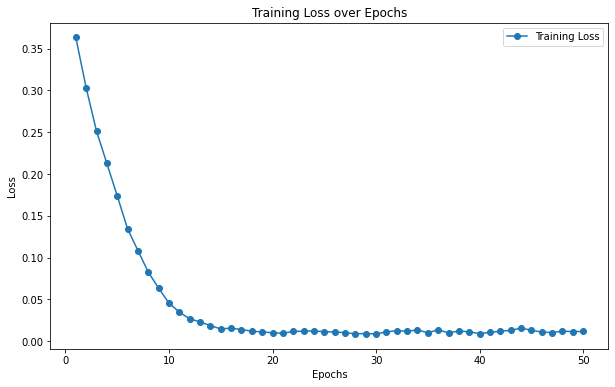

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

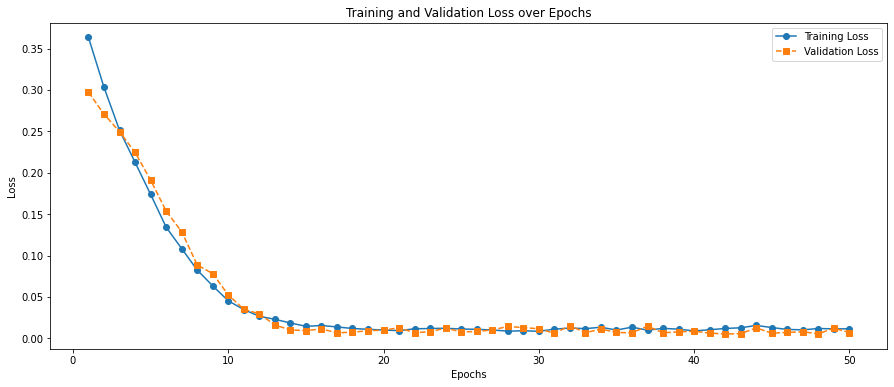

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Ross_model_LT9/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08174426954748262
MAE : 0.05855727415713778


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.161339e+06,1053272.694
1,6.108084e+05,368862.123
2,8.941312e+05,979418.298
3,1.831352e+06,2086269.569
4,2.707253e+06,2852731.016
5,3.299226e+06,3452823.613
6,3.730964e+06,3846843.974
7,3.848702e+06,4005222.451
8,3.930127e+06,4129684.505
9,3.804601e+06,4130311.577


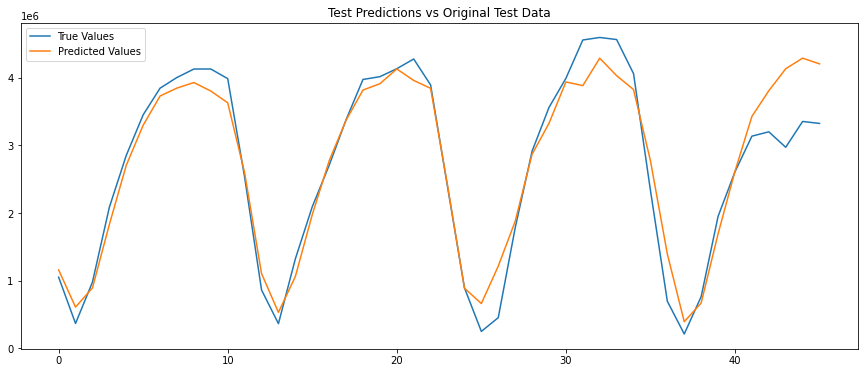

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 2ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

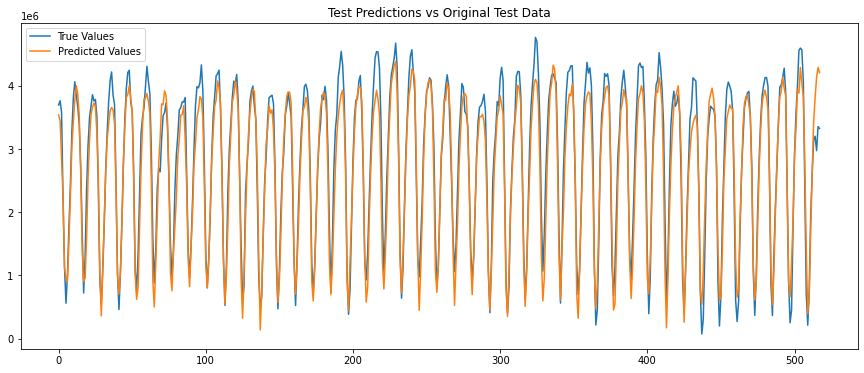

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()